In [1]:
import pandas as pd

In [9]:
#!pip install scikit-learn
#!pip install statsmodels
#!pip install nsepy

In [10]:
from nsepy import get_history as gh
import datetime as dt

In [18]:
start = dt.datetime(2021,7,1)
end = dt.datetime(2022,1,28)
stk_data = gh(symbol='TATACOFFEE',start=start,end=end)


AttributeError: 'function' object has no attribute 'download'

In [14]:
stk_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,


In [5]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [6]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,188.60,189.00,183.00,184.55
2021-07-02,183.05,187.50,182.15,186.40
2021-07-05,187.85,198.35,187.85,192.45
2021-07-06,193.80,194.80,187.35,188.80
2021-07-07,187.80,193.95,185.40,192.85
...,...,...,...,...
2022-01-21,217.70,224.40,216.70,219.55
2022-01-24,218.00,220.00,205.20,208.00
2022-01-25,207.50,213.70,200.00,211.90


In [7]:
column="Close"

In [8]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (145, 1)


In [9]:
len(data1)

145

In [11]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

116
X_train length: (116, 1)
X_test length: (29, 1)
y_train length: (116, 1)
y_test length: (29, 1)


In [12]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
 

Lag=1,Trend=n
RMSE-Testset: 0.2868932436955159
maPe-Testset: 0.43360580238884344
************
Lag=1,Trend=t
RMSE-Testset: 0.16951470088008333
maPe-Testset: 0.2820005995613298
************
Lag=1,Trend=c
RMSE-Testset: 0.13337394703457145
maPe-Testset: 0.21339999411720598
************
Lag=1,Trend=ct
RMSE-Testset: 0.09179414121321361
maPe-Testset: 0.15736863641062923
************
Lag=2,Trend=n
RMSE-Testset: 0.2894803633642015
maPe-Testset: 0.4373136510183856
************
Lag=2,Trend=t
RMSE-Testset: 0.18603860814066706
maPe-Testset: 0.31337835737364317
************
Lag=2,Trend=c
RMSE-Testset:

C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
 

 0.13234107370949924
maPe-Testset: 0.21130155290632857
************
Lag=2,Trend=ct
RMSE-Testset: 0.09758453779681193
maPe-Testset: 0.1685376607810605
************
Lag=3,Trend=n
RMSE-Testset: 0.262889996439986
maPe-Testset: 0.4013835659941446
************
Lag=3,Trend=t
RMSE-Testset: 0.1642292911333264
maPe-Testset: 0.2734369277895719
************
Lag=3,Trend=c
RMSE-Testset: 0.13429852014219743
maPe-Testset: 0.2155624769921304
************
Lag=3,Trend=ct
RMSE-Testset: 0.09595180044126173
maPe-Testset: 0.16470129672138936
************
Lag=4,Trend=n
RMSE-Testset: 0.27312201756270066
maPe-Testset: 0.41532397973372415
************
Lag=4,Trend=t
RMSE-Testset: 0.18556064961617738
maPe-Testset: 0.3114623093719079
************
Lag=4,Trend=c
RMSE-Testset: 0.13008006367125116
maPe-Testset: 0.20705814455179922
************
Lag=4,Trend=ct
RMSE-Testset: 0.09991375975212799
maPe-Testset: 0.17278333609640872
************


C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
 

In [13]:
len(y_pred)

29

In [16]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=ct
RMSE-Testset: 0.09179414121321361
maPe-Testset: 0.15736863641062923
************


C:\Anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


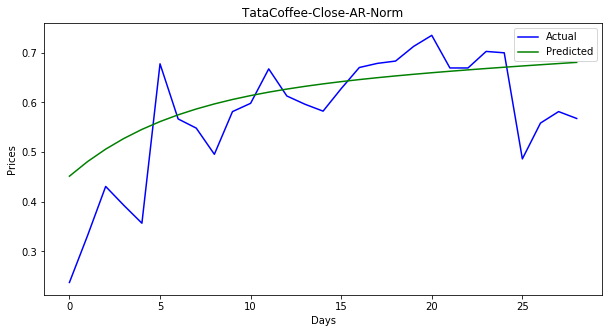

In [17]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [18]:
len(data1)

145

In [19]:
y_test

array([[0.23752311],
       [0.33179298],
       [0.43068392],
       [0.39279113],
       [0.35674677],
       [0.67744917],
       [0.56654344],
       [0.54805915],
       [0.49537893],
       [0.58133087],
       [0.59796673],
       [0.66728281],
       [0.61275416],
       [0.5961183 ],
       [0.58225508],
       [0.62754159],
       [0.67005545],
       [0.67837338],
       [0.68299445],
       [0.71256932],
       [0.73475046],
       [0.66913124],
       [0.66913124],
       [0.70240296],
       [0.69963031],
       [0.48613678],
       [0.55822551],
       [0.58133087],
       [0.56746765]])

In [20]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [21]:
aTestNormTable

,Close
0,0.237523
1,0.331793
2,0.430684
3,0.392791
4,0.356747
5,0.677449
6,0.566543
7,0.548059
8,0.495379
9,0.581331


In [22]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [23]:
actual_stock_price_test_ori

array([[194.55],
       [199.65],
       [205.  ],
       [202.95],
       [201.  ],
       [218.35],
       [212.35],
       [211.35],
       [208.5 ],
       [213.15],
       [214.05],
       [217.8 ],
       [214.85],
       [213.95],
       [213.2 ],
       [215.65],
       [217.95],
       [218.4 ],
       [218.65],
       [220.25],
       [221.45],
       [217.9 ],
       [217.9 ],
       [219.7 ],
       [219.55],
       [208.  ],
       [211.9 ],
       [213.15],
       [212.4 ]])

In [24]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [25]:
actual_stock_price_test_oriA

,Close
0,194.55
1,199.65
2,205
3,202.95
4,201
5,218.35
6,212.35
7,211.35
8,208.5
9,213.15


In [26]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [27]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

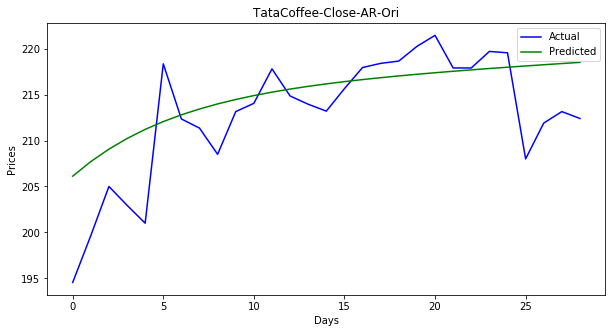

In [28]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [29]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 4.96606303963486
maPe-Testset: 0.018206719884773313


In [30]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [31]:
forecast

array([0.68269453, 0.68497716, 0.68723126, 0.68946136])

In [32]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [33]:
forecast_stock_price_test_oriF

,Closefore
0,218.634
1,218.757
2,218.879
3,219


In [34]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

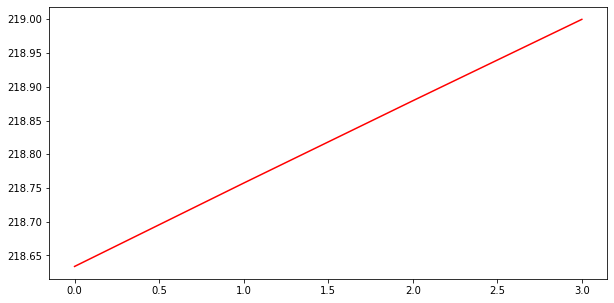

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")